In [5]:
# import the dataset into a pandas dataframe
import pandas as pd

df = pd.read_csv("sentiment140.csv", encoding='latin-1')

In [6]:
# set the column names
df.columns = ['sentiment','id','date','query_string','user','text']
# keep only the relevant columns: "sentiment" and "text"
df = df[['sentiment', 'text']]
# 0 for negative sentiment; 1 for positive sentiment
df['sentiment'] = df['sentiment'].replace({4: 1})
df["sentiment"].value_counts()

sentiment
1    800000
0    799999
Name: count, dtype: int64

In [7]:
# data cleaning and normalization
import nltk
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

# function to clean text ie, lowercase, tokenize, remove stop words and punctuation
def clean_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if not w in string.punctuation]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

df = df[['sentiment', 'clean_text']]
df.to_csv('clean_sentiment140.csv')

[nltk_data] Downloading package punkt to /home/zubayer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zubayer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
df = pd.read_csv('clean_sentiment140.csv')

In [4]:
import pickle
# Drop NaN values from the training set
df.dropna(subset=['clean_text', 'sentiment'], inplace=True)

#Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

#Vectorize the text data using the CountVectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train_vector = vectorizer.transform(X_train)
X_test_vector = vectorizer.transform(X_test)


In [ ]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [12]:
from sklearn.naive_bayes import MultinomialNB
import pickle

#Train a Multinomial Naive Bayes model on the training data:
model = MultinomialNB()
model.fit(X_train_vector, y_train)

#save the MultinomialNB model
filename = "MultinomialNB_model"
pickle.dump(model, open(filename, 'wb'))

#Evaluate the performance of the model on the testing data:
#unpickle the saved model
accuracy = pickle.load(open(filename, 'rb')).score(X_test_vector, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.7718448877789897


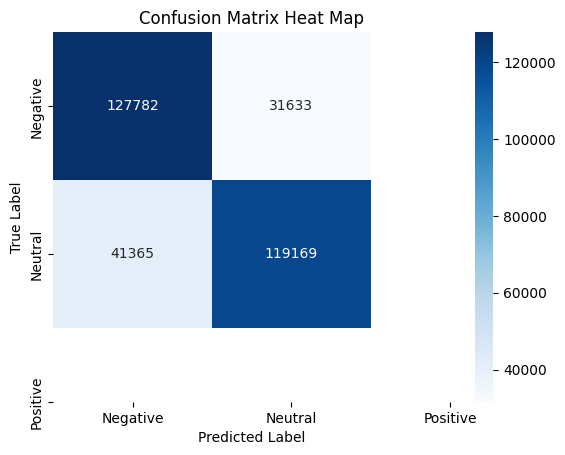

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

filename = "MultinomialNB_model"


# Load the saved model
model = pickle.load(open(filename, 'rb'))

# Make predictions on the testing data
y_pred = model.predict(X_test_vector)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heat map
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map')
plt.show()


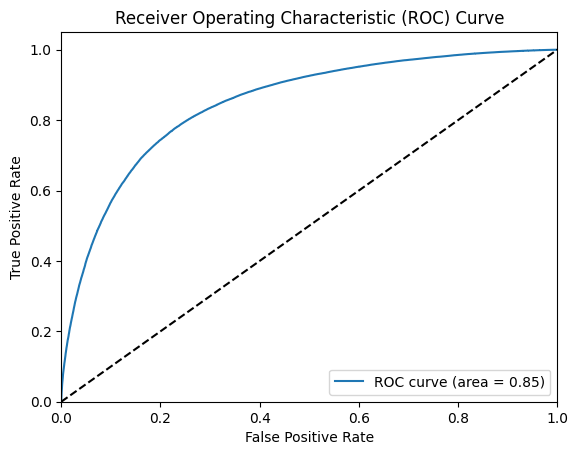

In [11]:
from sklearn.metrics import roc_curve, auc

filename = "MultinomialNB_model"


# Load the saved model
model = pickle.load(open(filename, 'rb'))

# Calculate the probabilities of the model's predictions
y_pred_prob = model.predict_proba(X_test_vector)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


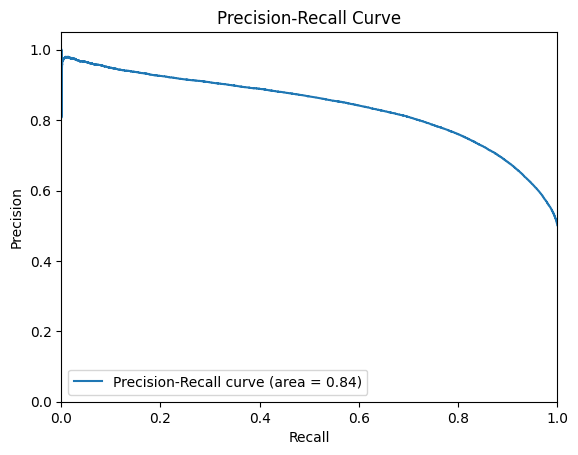

In [12]:
from sklearn.metrics import precision_recall_curve, auc


filename = "MultinomialNB_model"


# Load the saved model
model = pickle.load(open(filename, 'rb'))

# Calculate the probabilities of the model's predictions
y_pred_prob = model.predict_proba(X_test_vector)[:, 1]

# Calculate the precision, recall, and threshold for different threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate the area under the precision-recall curve (AUC)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


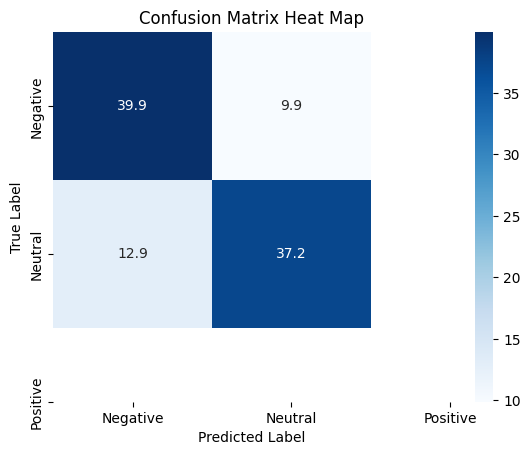

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

filename = "MultinomialNB_model"


# Load the saved model
model = pickle.load(open(filename, 'rb'))

# Make predictions on the testing data
y_pred = model.predict(X_test_vector)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the total number of samples
total = np.sum(cm)

# Create the heat map
sns.heatmap(cm/total*100, annot=True, cmap='Blues', fmt='.1f', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map')
plt.show()



In [8]:
from sklearn.metrics import classification_report

# predict labels for the testing data using the Naive Bayes model
y_pred = model.predict(X_test_vector)

# generate classification report
report = classification_report(y_test, y_pred)

# print the report
print(report)


              precision    recall  f1-score   support

           0       0.76      0.80      0.78    159415
           1       0.79      0.74      0.77    160534

    accuracy                           0.77    319949
   macro avg       0.77      0.77      0.77    319949
weighted avg       0.77      0.77      0.77    319949



In [9]:
from sklearn.linear_model import LogisticRegression
import pickle

# Train a logistic regression model on the training data:
model = LogisticRegression()
model.fit(X_train_vector, y_train)

# Save the logistic regression model
filename = "logistic_regression_model"
pickle.dump(model, open(filename, 'wb'))

# Evaluate the performance of the model on the testing data:
# Unpickle the saved model
accuracy = pickle.load(open(filename, 'rb')).score(X_test_vector, y_test)

print("Accuracy:", accuracy)


/home/zubayer/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7813276490940744


In [10]:
from sklearn.metrics import classification_report

# predict labels for the testing data using the Naive Bayes model
y_pred = model.predict(X_test_vector)

# generate classification report
report = classification_report(y_test, y_pred)

# print the report
print(report)


              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159415
           1       0.77      0.80      0.79    160534

    accuracy                           0.78    319949
   macro avg       0.78      0.78      0.78    319949
weighted avg       0.78      0.78      0.78    319949



In [1]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Train a Random Forest model on the training data:
model = RandomForestClassifier()
model.fit(X_train_vector, y_train)

# Save the Random Forest model
filename = "random_forest_model"
pickle.dump(model, open(filename, 'wb'))

# Evaluate the performance of the model on the testing data:
# Unpickle the saved model
accuracy = pickle.load(open(filename, 'rb')).score(X_test_vector, y_test)

print("Accuracy:", accuracy)


NameError: name 'X_train_vector' is not defined

In [ ]:
#Use the model to make predictions on new tweets:
new_tweet = ["I feel not so happy today"]
print(new_tweet)
new_tweet_vec= vectorizer.transform(new_tweet)
prediction = model.predict(new_tweet_vec)
print(prediction)

['I feel not so happy today']
[0]


In [ ]:
# Compute some basic statistics:
num_samples = len(df)
num_positive = len(df[df['sentiment'] == 1])
num_negative = len(df[df['sentiment'] == 0])
num_tokens = df['clean_text'].apply(lambda x: len(x.split())).sum()
avg_tokens_per_sample = num_tokens / num_samples

# Print the results:
print("Number of samples:", num_samples)
print("Number of positive samples: ", num_positive)
print("Number of negative samples: ",num_negative)
print("Number of tokens: ", num_tokens)
print(f"Average number of tokens per sample: {avg_tokens_per_sample:.2f}")

Number of samples: 1599999
Number of positive samples:  800000
Number of negative samples:  799999
Number of tokens:  13402171
Average number of tokens per sample: 8.38


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the predicted labels from the model
y_pred = model.predict(X_test_vector)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", round(accuracy,3))
print("Precision:", round(precision,3))
print("Recall:", round(recall, 3))
print("F1-score:", round(f1,3))


Accuracy: 0.771
Precision: 0.789
Recall: 0.741
F1-score: 0.764
